## Face Recognition using Support Vector Classification Method

### Step one:  obtaining the data

Let us use [fetch_lfw_people](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html) from [sklearn.datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) to load the labeled faces in the Wild (LFW) people dataset. Run the following cell to check whose face images are included in the dataset. There are 1348 images, and the size of each image is 62 by 47.

In [2]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)

# People in the dataset
print(faces.target_names)

# Shape (size) of the dataset
# (# of images, height, width of each image)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


### Task 1: Replace "???" in the following cell, where 15 face images must be put into three rows and five columns.

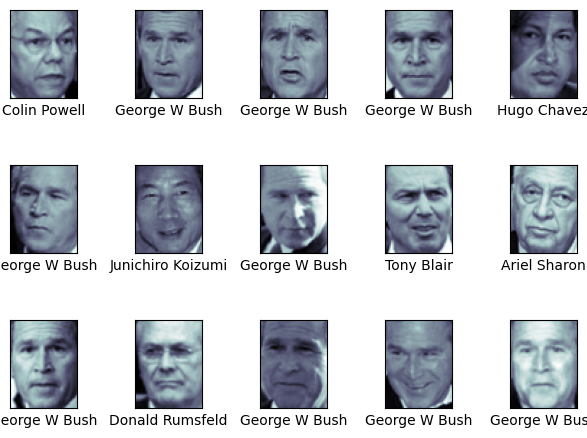

In [3]:
import matplotlib.pyplot as plt

"""Plot some images"""
fig, ax = plt.subplots(3, 5)  # 3 rows, 5 columns
fig.tight_layout()  # To adjust spacing between subplots
for i, axi in enumerate(ax.flat): 
    axi.imshow(faces.images[i], cmap='bone')  # cmap='bone' is a grayscale colormap
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

### Step two: Splitting the dataset into a training set, a validation set and a test set

You may first split the whole dataset into a training set and a test set, then further divide the training set into a smaller training set and a validation set. In this exercise, let us keep 35% of the total data  in the test set; and 30% of the training data in the validation set. 

### Task 2: Check how to use the function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and then replace "???" in the following cell to split the dataset.

In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (70% training, 30% testing)
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, test_size=0.3, random_state=42)

# Further split the training set into training and validation sets (65% training, 35% validation)
SXtrain, Xvalid, Sytrain, vtest = train_test_split(Xtrain, ytrain, test_size=0.35, random_state=42)

print(Xtrain.shape, Xtest.shape)

(943, 2914) (405, 2914)


### Step three: normalise the training set and the validation set

Note that in this step the scaling parameters should be obtained from the smaller training set only. You need to use the same parameter to normalise both the smaller training set and the validation set, which can be done using the method transform() of [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). 

### Task 3: Replace "???" in the following cell to finish the normalisation.

In [5]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(SXtrain)

# Scale the training set to normalise the data
scaled_trnX = scaler.transform(SXtrain)  

# Scale the validation set using the same scaler
scaled_valX = scaler.transform(Xvalid)

### Step four: choose the most suitable parameters by comparing results on the same validation set.

You will fit an SVM with an RBF kernel on the smaller training set.  Have a look at how to use a [C-Support Vector Classification from sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) first. Please pay attention to how to assign a kernel type, C value, and gamma value in SVC, and how to use the fit method and the predict method.

In this task, you will choose a suitable gamma value from three values:
0.0005, 0.001 and 0.0007; and use a fixed C value. For example, C=10.

### Task 4 a) Replace "???" in the following cell. You need to use one of those three gamma values mentioned above. Report the accuracy rate of the model using [metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html). You can produce more performance metrics using [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).  

In [6]:
from sklearn.svm import SVC  # "Support vector classifier"

# Kernel: rbf (radial basis function)
# Class weight: balanced because there are different number of images for each person
# C: 10 (regularisation parameter) 
# gamma: 0.0005 (kernel coefficient)
svc1 = SVC(kernel='rbf', class_weight='balanced', C=10, gamma=0.0005)
model1 = svc1.fit(scaled_trnX, Sytrain)  # Model fitting using the scaled training set and the target training set

# The fitted model should be validated on the scaled validation set!
vyfit1 = model1.predict(scaled_valX)  # Model validation using the scaled validation set

# Performance evaluation
from sklearn import metrics 
print('Accuracy:', metrics.accuracy_score(vtest, vyfit1))

from sklearn.metrics import classification_report
print(classification_report(vtest, vyfit1, target_names=faces.target_names))

Accuracy: 0.7280966767371602
                   precision    recall  f1-score   support

     Ariel Sharon       0.85      0.50      0.63        22
     Colin Powell       0.76      0.81      0.79        43
  Donald Rumsfeld       0.85      0.52      0.64        33
    George W Bush       0.68      0.99      0.81       138
Gerhard Schroeder       0.53      0.40      0.45        25
      Hugo Chavez       1.00      0.22      0.36        23
Junichiro Koizumi       1.00      0.56      0.71        18
       Tony Blair       0.89      0.59      0.71        29

         accuracy                           0.73       331
        macro avg       0.82      0.57      0.64       331
     weighted avg       0.77      0.73      0.70       331



### Task 4 b) Replace "???" in the following cell. You need to use another gamma value mentioned above. Report the performance of the model.

In [7]:
"""Step four: continued"""

svc2 = SVC(kernel='rbf', class_weight='balanced', C=10, gamma=0.001)
model2 = svc2.fit(scaled_trnX, Sytrain)

# The fitted model should be validated on the scaled validation set!
vyfit2 = model2.predict(scaled_valX)  # Model validation using the scaled validation set

# Performance evaluation
from sklearn import metrics 
print('Accuracy:', metrics.accuracy_score(vtest, vyfit2))

from sklearn.metrics import classification_report
print(classification_report(vtest, vyfit2, target_names=faces.target_names))

Accuracy: 0.5770392749244713
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.18      0.31        22
     Colin Powell       0.81      0.51      0.63        43
  Donald Rumsfeld       1.00      0.24      0.39        33
    George W Bush       0.51      0.99      0.67       138
Gerhard Schroeder       0.83      0.20      0.32        25
      Hugo Chavez       0.00      0.00      0.00        23
Junichiro Koizumi       1.00      0.17      0.29        18
       Tony Blair       0.86      0.41      0.56        29

         accuracy                           0.58       331
        macro avg       0.75      0.34      0.40       331
     weighted avg       0.68      0.58      0.51       331



c:\Users\marsp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\marsp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\marsp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Task 4 c) Replace "???" in the following cell. You need to use the third gamma value mentioned above. Report the performance of the model.

In [8]:
# Step four: continued

svc3 = SVC(kernel='rbf', class_weight='balanced', C=10, gamma=0.0007)
model3 = svc3.fit(scaled_trnX, Sytrain)

# The fitted model should be validated on the scaled validation set!
vyfit3 = model3.predict(scaled_valX)  # Model validation using the scaled validation set

# Performance evaluation
from sklearn import metrics 
print('Accuracy:', metrics.accuracy_score(vtest, vyfit3))

from sklearn.metrics import classification_report
print(classification_report(vtest, vyfit3, target_names=faces.target_names))

Accuracy: 0.6706948640483383
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.36      0.53        22
     Colin Powell       0.80      0.74      0.77        43
  Donald Rumsfeld       0.93      0.42      0.58        33
    George W Bush       0.59      0.99      0.74       138
Gerhard Schroeder       0.80      0.32      0.46        25
      Hugo Chavez       1.00      0.13      0.23        23
Junichiro Koizumi       1.00      0.28      0.43        18
       Tony Blair       0.76      0.55      0.64        29

         accuracy                           0.67       331
        macro avg       0.86      0.47      0.55       331
     weighted avg       0.76      0.67      0.63       331



### Task 4 d) Choose the most suitable gamma value by comparing results obtained from the three fitted models and replace "???" in the following cell.


In [9]:
# According to the classification report, the best model is svc1, with gamma = 0.0005
suitable_gamma = 0.0005

### Step five: further test the selected parameters on the test set

First, you need to normalise the training set and the test set. Note that the training set is the original one including both the smaller training set and the validation set. Again, it is important that the scaling parameters should come from the training set, which should be used to normalise both the training set and the test set.

### Task 5 a) Replace "???" in the following cell to finish the normalisation.

In [10]:
scaler = preprocessing.StandardScaler().fit(Xtrain)  # Fit the scaler to the training set

scaled_X = scaler.transform(Xtrain)  # Normalise the training set    
scaled_tstX = scaler.transform(Xtest)  # Normalise the testing set

Next, you need to fit an SVM model with the most suitable parameters obtained from Step four, test the trained model on the test set, and report the performance.

### Task 5 b) Replace "???" in the following cell.

In [11]:
svc_final = SVC(kernel='rbf', class_weight='balanced', C=10, gamma=suitable_gamma)
model_final = svc_final.fit(scaled_X, ytrain)  # Model fitting using the scaled training set and the target training set
yfit_test = model_final.predict(scaled_tstX)  # Model validation using the scaled testing set

from sklearn import metrics 
print('Accuracy:', metrics.accuracy_score(ytest, yfit_test))

print(classification_report(ytest, yfit_test, target_names=faces.target_names))

Accuracy: 0.7481481481481481
                   precision    recall  f1-score   support

     Ariel Sharon       0.77      0.59      0.67        17
     Colin Powell       0.85      0.80      0.82        84
  Donald Rumsfeld       0.75      0.58      0.66        36
    George W Bush       0.69      0.93      0.79       146
Gerhard Schroeder       0.62      0.54      0.58        28
      Hugo Chavez       1.00      0.33      0.50        27
Junichiro Koizumi       0.89      1.00      0.94        16
       Tony Blair       0.81      0.57      0.67        51

         accuracy                           0.75       405
        macro avg       0.80      0.67      0.70       405
     weighted avg       0.77      0.75      0.74       405



### Task 5 c) Which person's face images have the highest accuracy rate? Which person's face images have the lowest accuracy rate? Can you find the misclassified predictions?

#### You may further visualise the results using a confusion matrix as follows:

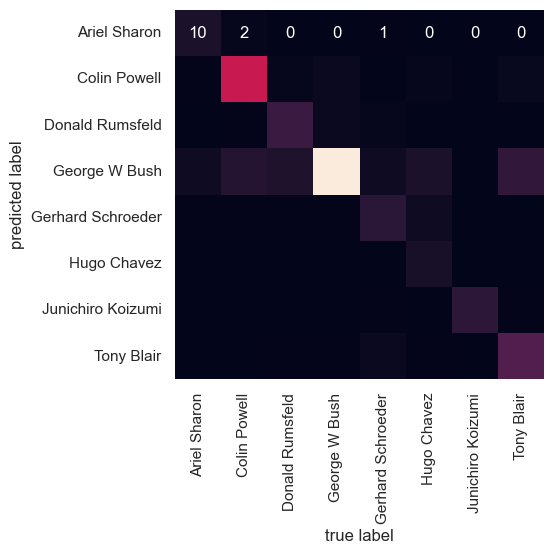

In [28]:
from sklearn.metrics import confusion_matrix
# use Seaborn plotting defaults
import seaborn as sns; sns.set()

mat = confusion_matrix(ytest, yfit_test)  # A confusion matrix is a table that is often used to describe the performance of a classification model
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('../supervisedL/heatmap.png')

### Advanced task: Learn how to do an exhaustive search over specified parameter values.
    

In [13]:
# Do a grid search to find the best parameters for the model
from sklearn.model_selection import GridSearchCV


You can do a grid search using [sklearn.grid_search.GridSearchCV](https://scikit-learn.org/0.16/modules/generated/sklearn.grid_search.GridSearchCV.html). To understand how it works, you need to know what the cross-validation (CV) method is and how it works. A gentle introduction about CV can be viewed [here](https://machinelearningmastery.com/k-fold-cross-validation/#:~:text=Cross-validation%20is%20a%20resampling%20procedure%20used%20to%20evaluate,such%2C%20the%20procedure%20is%20often%20called%20k-fold%20cross-validation.).   